![](https://img.kaikeba.com/web/kkb_index/img_index_logo.png)

# 人工智能基础课机器学习 第三节课作业 线性回归

同学们大家好，本次作业是考察学生对线性回归的理解与SKLearn的使用，以及pandas的使用。

本次作业的数据集：data.csv
这份数据代表了一个循环发电厂，每个数据有5列，分别是:AT（温度）, V（压力）, AP（湿度）, RH（压强）, PE（输出电力)

问题是得到一个线性的关系，对应PE是样本输出，而AT/V/AP/RH这4个是样本特征， 机器学习的目的就是得到一个线性回归模型，即: PE=W0+W1∗AT+W2∗V+W3∗AP+W4∗RH 而需要学习的，就是W0,W1,W2,W3,W4这5个参数。


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体

# 第一步：读取样本数据，并将数据集分为训练集和测试集




In [3]:
df = pd.read_csv('data.csv')
x = df[['AT','V','AP','RH']].values
y = df['PE'].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)
print(x_train.shape,y_train.shape)

(6697, 4) (6697,)


#  第二步：训练Linear Regreesion模型，得到训练参数



In [5]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print("lr.intercept:",lr.intercept_)
print("lr.coef_:",lr.coef_)

lr.intercept: 448.5306714055785
lr.coef_: [-1.9797936  -0.23300225  0.06812315 -0.15839461]


# 第三步：使用均方误差和均方根误差在测试集上的表现来评价模型的好坏。



In [33]:
y_pred = lr.predict(x_test)
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("均方误差：",mse)
print("均方根误差：",rmse)

均方误差： 20.603181302087755
均方根误差： 4.539072735932721


# 第四步：可视化的方式直观的表示模型学习效果的好坏



Text(0, 0.5, '预测值')

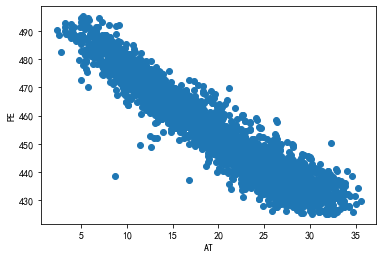

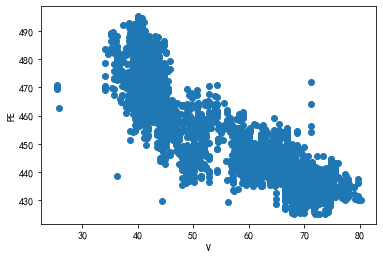

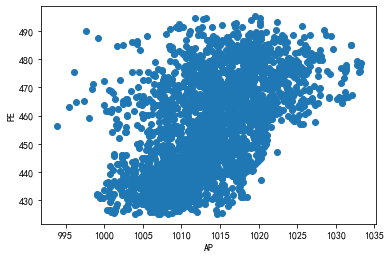

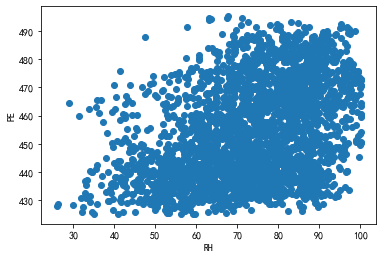

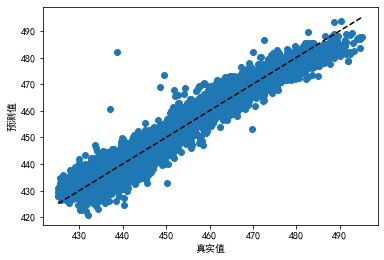

In [36]:
#'AT','V','AP','RH'

x1,x2,x3,x4 = x_test[:,0],x_test[:,1],x_test[:,2],x_test[:,3]

plt.figure('AT-PE')
plt.scatter(x1,y_test)
plt.xlabel('AT')
plt.ylabel('PE')

plt.figure('V-PE')
plt.scatter(x2,y_test)
plt.xlabel('V')
plt.ylabel('PE')

plt.figure('AP-PE')
plt.scatter(x3,y_test)
plt.xlabel('AP')
plt.ylabel('PE')

plt.figure('RH-PE')
plt.scatter(x4,y_test)
plt.xlabel('RH')
plt.ylabel('PE')


plt.figure('真实值-预测值')
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--')
plt.xlabel('真实值')
plt.ylabel('预测值')

